# Interactive Session 5

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:

data=pd.read_csv('shopsurvey.csv')
s=data==-999
data[s]=np.nan

In [3]:
data[['shoptue','shopfri','shopmon']].describe()

shoptue     shopfri     shopmon
count  135.000000  187.000000  123.000000
mean     1.059259    1.042781    1.065041
std      0.688530    0.585018    0.721336
min      1.000000    1.000000    1.000000
25%      1.000000    1.000000    1.000000
50%      1.000000    1.000000    1.000000
75%      1.000000    1.000000    1.000000
max      9.000000    9.000000    9.000000

In [4]:
from statsmodels.stats.proportion import proportions_ztest

In [5]:
#Python does this test is a slightly different way to R and Gretl, the result is almost the same though
N=len(data)
count = np.array([N-135,N-187])
nobs = np.array([N, N])
stat, pval = proportions_ztest(count, nobs)
print(stat,'{0:0.8f}'.format(pval))

3.66381465589937 0.00024849


In [6]:
count = np.array([N-135,N-123])
nobs = np.array([N, N])
stat, pval = proportions_ztest(count, nobs)
print(stat,'{0:0.8f}'.format(pval))

-0.8929401954728163 0.37188920


In [7]:
data[['enjoy','getout']].describe()

enjoy      getout
count  423.000000  423.000000
mean     2.903073    3.340426
std      1.033819    1.161159
min      1.000000    1.000000
25%      2.000000    2.000000
50%      3.000000    4.000000
75%      4.000000    4.000000
max      5.000000    5.000000

In [8]:
from scipy.stats import ttest_ind,ttest_1samp

In [9]:
#This is strictly correct since the data is paired
diff=data['enjoy']-data['getout']
ttest_1samp(diff,0,nan_policy='omit')

Ttest_1sampResult(statistic=-8.31573021279508, pvalue=1.3048571422329349e-15)

In [10]:
#In the gretl example we treat them as though they are unpaired
ttest_ind(data['enjoy'],data['getout'],nan_policy='omit')

Ttest_indResult(statistic=-5.785710216450849, pvalue=1.017104740719899e-08)

In [11]:
mod=ols('enjoy~sex',data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  enjoy   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.095
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.296
Time:                        09:15:32   Log-Likelihood:                -602.39
No. Observations:                 415   AIC:                             1209.
Df Residuals:                     413   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1474      0.238     13.203      0.0

In [12]:
mod=ols('getout~sex',data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 getout   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2114
Date:                Sat, 07 Jan 2023   Prob (F-statistic):              0.646
Time:                        09:15:32   Log-Likelihood:                -652.70
No. Observations:                 416   AIC:                             1309.
Df Residuals:                     414   BIC:                             1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4490      0.267     12.941      0.0

# Slides 5A

In [13]:
#For the slides 5A
N=30;count = 21;pstar=0.5
stat, pval = proportions_ztest(count, N,pstar,prop_var=pstar)
print(stat,'{0:0.8f}'.format(pval))

2.1908902300206643 0.02845974


In [14]:
N=30
count = np.array([21,19])
nobs = np.array([N, N])
stat, pval = proportions_ztest(count, nobs)
print(stat,'{0:0.8f}'.format(pval))

0.547722557505166 0.58388242


#  Slides 5B

In [15]:
import wooldridge as woo
import histogram

In [16]:
crime1= woo.data('crime1')
woo.data('crime1', description=True)

name of dataset: crime1
no of variables: 16
no of observations: 2725

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| narr86   | # times arrested, 1986          |
| nfarr86  | # felony arrests, 1986          |
| nparr86  | # property crme arr., 1986      |
| pcnv     | proportion of prior convictions |
| avgsen   | avg sentence length, mos.       |
| tottime  | time in prison since 18 (mos.)  |
| ptime86  | mos. in prison during 1986      |
| qemp86   | # quarters employed, 1986       |
| inc86    | legal income, 1986, $100s       |
| durat    | recent unemp duration           |
| black    | =1 if black                     |
| hispan   | =1 if Hispanic                  |
| born60   | =1 if born in 1960              |
| pcnvsq   | pcnv^2                          |
| pt86sq   | ptime86^2                       |
| inc86sq  | inc86^2                         |
+----------+-------------------------

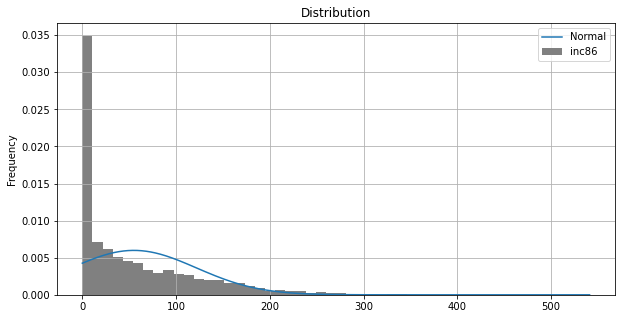

In [17]:
histogram.histogram(crime1,y='inc86',bins=50,normed=False,normal=True)

In [18]:
ttest_1samp(crime1[['inc86']],100,nan_policy='omit')

Ttest_1sampResult(statistic=array([-35.28271865]), pvalue=array([6.36029895e-225]))

#  Slides 5C,D

In [19]:
diffarest=crime1['nfarr86']-crime1['nparr86']
ttest_1samp(diffarest,0,nan_policy='omit')

Ttest_1sampResult(statistic=12.160655403446523, pvalue=3.587631785730947e-33)

In [20]:
s=crime1['hispan']==1
df1=crime1[s]
df2=crime1[~s]

In [21]:
ttest_ind(df1['narr86'],df2['narr86'],nan_policy='omit')

Ttest_indResult(statistic=2.769714119181189, pvalue=0.005648591019950741)

In [22]:
ttest_ind(df1['narr86'],df2['narr86'],nan_policy='omit',equal_var=False)

Ttest_indResult(statistic=2.6289850237026986, pvalue=0.008712653107495248)

In [23]:
mod=ols('narr86~hispan',crime1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.671
Date:                Sat, 07 Jan 2023   Prob (F-statistic):            0.00565
Time:                        09:15:34   Log-Likelihood:                -3448.4
No. Observations:                2725   AIC:                             6901.
Df Residuals:                    2723   BIC:                             6913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3804      0.019     20.470      0.0

In [24]:
#With Robust Standard erros

mod=ols('narr86~hispan',crime1).fit(cov_type = "HC0")
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 narr86   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.922
Date:                Sat, 07 Jan 2023   Prob (F-statistic):            0.00856
Time:                        09:15:34   Log-Likelihood:                -3448.4
No. Observations:                2725   AIC:                             6901.
Df Residuals:                    2723   BIC:                             6913.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3804      0.018     20.922      0.0

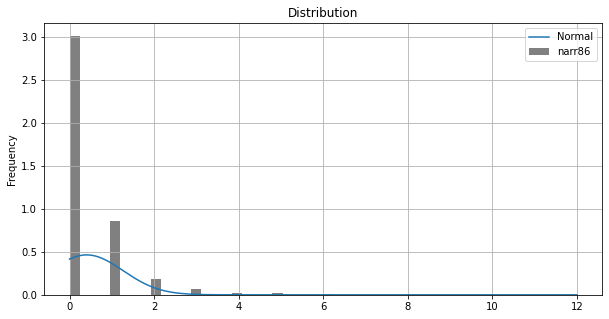

In [25]:
histogram.histogram(crime1,y='narr86',bins=50,normed=False,normal=True)